# Node Tuning

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import kerastuner as kt # for tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_20356\3655248104.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt # for tuning


In [2]:
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.6839137 , -0.70579433, -0.625833  , ...,  0.26501306,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.26972894,  0.29889263, ...,  0.48823955,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.39431905, -0.29945925, ..., -0.15517797,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.07289387,  0.13570575, ...,  0.21248918,
         0.77981801,  0.09377001],
       [-0.22446668, -1.32874488, -1.06099801, ..., -0.12891603,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.45661411,  0.13570575, ..., -0.81172646,
        -0.77166568, -0.51505559]])

In [3]:
def build_model(hp):
    model = Sequential()

    units = hp.Int('numberOfNodes',
                   min_value = 8, # initial value
                   max_value = 128, # last value
                   )
    initializer = tf.keras.initializers.he_normal
    model.add(
        Dense(units=units,activation = 'relu',input_dim = 8,kernel_initializer = initializer))
    model.add(
        Dense(1,activation = 'sigmoid'))

    model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

    return model


In [4]:
tuner = kt.RandomSearch(hypermodel=build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='tuner',
                        project_name = 'nodeTuner'
                        )

In [5]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.6510416865348816

Best val_accuracy So Far: 0.6510416865348816
Total elapsed time: 00h 00m 09s
INFO:tensorflow:Oracle triggered exit


In [6]:
# for best parameters
tuner.get_best_hyperparameters()[0].values

{'numberOfNodes': 53}

In [7]:
# to directly extract model from hyperparameter tuning...........
model = tuner.get_best_models(num_models=1)[0]
model

In [8]:
# Training model
history = model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
18/18 [==============================] - 1s 12ms/step - loss: 4.9740 - accuracy: 0.6337 - val_loss: 4.0921 - val_accuracy: 0.5729
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 3.9225 - accuracy: 0.6094 - val_loss: 4.0037 - val_accuracy: 0.5781
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 3.6475 - accuracy: 0.6094 - val_loss: 3.7451 - val_accuracy: 0.6094
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 3.3951 - accuracy: 0.6163 - val_loss: 3.5188 - val_accuracy: 0.6198
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 3.1716 - accuracy: 0.6181 - val_loss: 3.2444 - val_accuracy: 0.6094
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 2.9573 - accuracy: 0.6233 - val_loss: 3.0830 - val_accuracy: 0.6458
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 2.7149 - accuracy: 0.6354 - val_loss: 2.7930 - val_accuracy: 0.6354
Epoch 14

In [9]:
model.get_weights()

[array([[ 6.16009474e-01,  5.24457954e-02, -1.35885671e-01,
         -4.47677858e-02,  5.51048040e-01, -9.06867534e-02,
          7.38941669e-01, -7.07169592e-01, -6.48880601e-01,
          3.95567209e-01,  2.95056641e-01, -6.20678008e-01,
          3.89452398e-01,  3.12032610e-01, -6.65705740e-01,
          6.09455585e-01,  4.16271865e-01, -1.06301534e+00,
          7.25090444e-01, -2.07677528e-01,  2.41037488e-01,
         -8.52516890e-01, -2.14218438e-01, -8.97350088e-02,
         -5.17279744e-01,  8.86548221e-01,  2.59461313e-01,
         -5.98023772e-01, -4.48559910e-01, -4.91355658e-01,
         -1.64365664e-01,  5.61224341e-01,  5.17723151e-03,
          3.34088385e-01, -2.45278090e-01,  2.26389810e-01,
         -5.01540899e-01, -1.84276417e-01,  3.51227701e-01,
         -6.81542456e-01, -2.00737789e-01,  1.18078840e+00,
          5.01078725e-01, -1.62776411e-01,  2.15354003e-02,
         -3.98840904e-02, -3.97378027e-01, -4.44259457e-02,
          9.44093689e-02, -4.17356730e-0

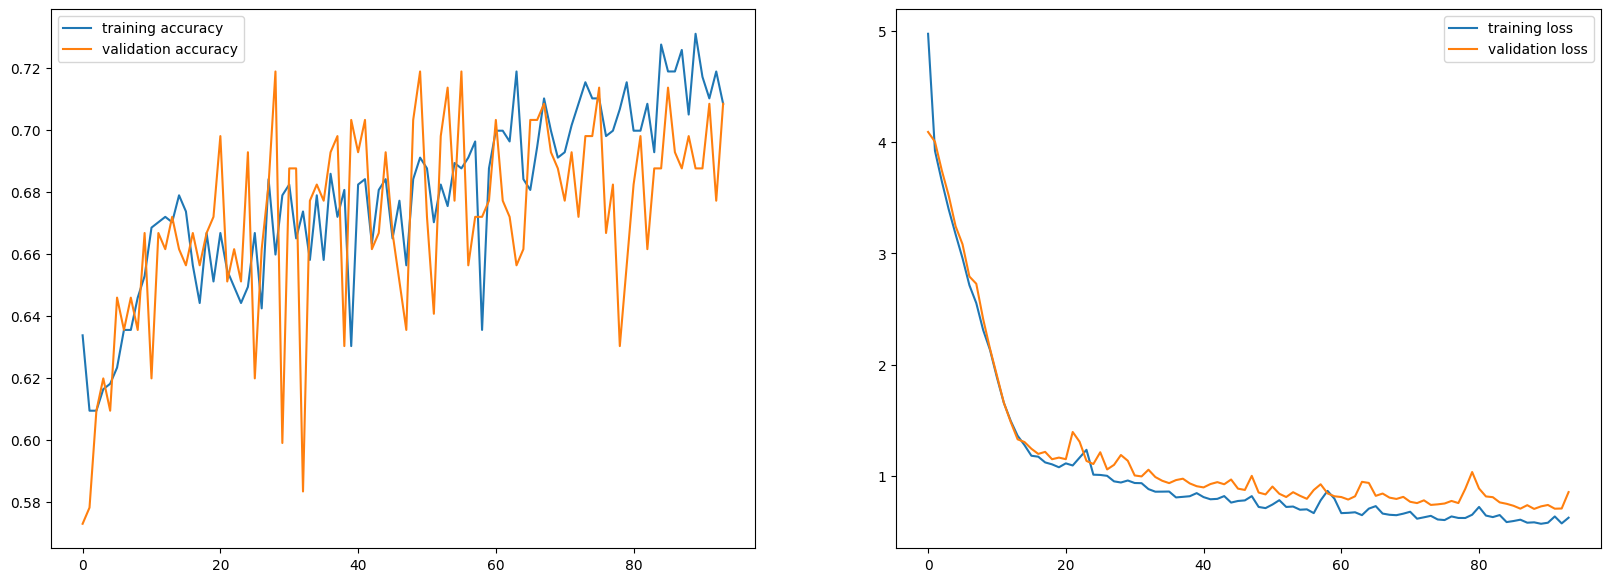

In [10]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
